#**Generative Fashion Search System**

#**Project Overview**

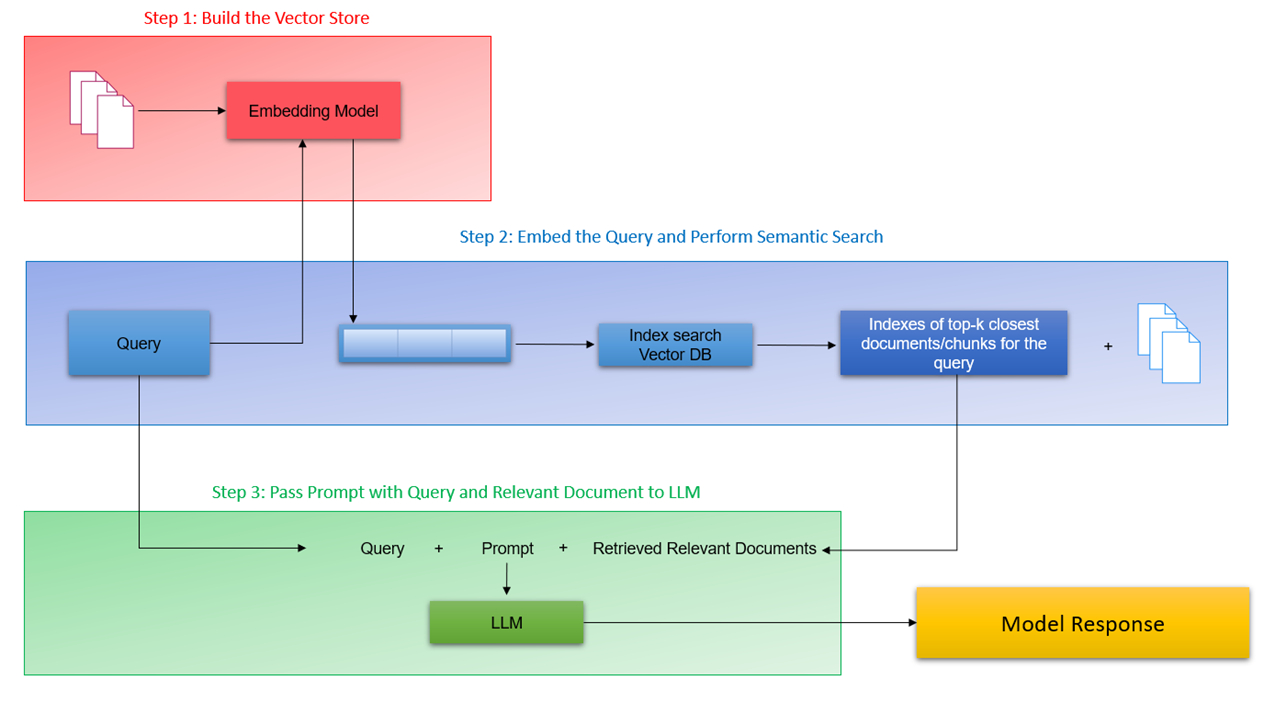

# **Generative Fashion Search System**  
**Utilizing Embedding Models, Vector Search, and LLM for Recommendations**

---

## **Objective**  
### ****Developing an Intelligent Fashion Search System****  
- Search product descriptions and recommend appropriate choices based on user queries.  
- Leverage the Myntra dataset from Kaggle for implementation.  

---

## **Project Scope**  
### ****Implementing the Three-Layered Architecture****  
1. **Embedding Layer**: Process and prepare product descriptions for embedding.  
2. **Search Layer**: Perform semantic search with query embeddings and implement re-ranking.  
3. **Generation Layer**: Craft LLM prompts to generate accurate and user-specific responses.  

---

## **Implementation Details**  

### **Embedding Layer**  
#### ****Step 1: Preprocess the Dataset****  
- Upload, clean, and preprocess the CSV file.  
- Use a pre-trained model to generate embeddings for product descriptions.  

---

### **Search Layer**  
#### ****Step 2: Perform Vector Search and Re-Ranking****  
- Embed and search using at least three test queries.  
- Implement a cache mechanism for optimization.  
- Re-rank results using HuggingFace cross-encoding models.  

---

### **Generation Layer**  
#### ****Step 3: Design the Prompt for the LLM****  
- Integrate query and retrieved results into the prompt.  
- Generate accurate and meaningful recommendations.  

---

### **Outcome**  
By implementing and experimenting with this layered approach, the system aims to deliver efficient and user-centric product search capabilities.

---

This structure is formatted for readability in Colab, with clear distinctions between sections and a hierarchical outline of the steps. Would you like to include specific Markdown tips for Colab usage as well?

# **1. Installing and Importing Required Libraries**

In [1]:
# Install all the required libraries

!pip install pdfplumber tiktoken openai chromaDB sentence-transformers -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 617.9/617.9 kB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 57.4 MB/s eta 0:00:00

In [2]:

# Importing necessary libraries
import tiktoken  # Assuming this is a custom library for tokenization
import openai  # OpenAI library for accessing GPT models
import chromadb  # ChromaDB library for database operations
from pathlib import Path  # For handling file paths
import pandas as pd  # Pandas for data manipulation
from operator import itemgetter  # For sorting dictionaries
import json  # For working with JSON data
from sklearn.feature_extraction.text import TfidfVectorizer  # TF-IDF vectorizer
from sklearn.metrics.pairwise import cosine_similarity  # Cosine similarity calculation
from nltk.corpus import stopwords  # Stopwords for text processing
from nltk.tokenize import word_tokenize  # Tokenization
import string  # String manipulation functions
from PIL import Image  # Image processing library
import requests  # For making HTTP requests
from io import BytesIO  # For handling binary data
import matplotlib.pyplot as plt  # Matplotlib for visualization
from matplotlib import table  # Table visualization in Matplotlib
import os  # Operating system utilities
import matplotlib.image as mpimg

# Import the CrossEncoder library from sentence_transformers
from sentence_transformers import CrossEncoder, util
# Importing required functions and classes from ChromaDB
from chromadb.utils.embedding_functions import OpenAIEmbeddingFunction

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [3]:
# Importing the necessary library for mounting Google Drive
from google.colab import drive

# Mounting Google Drive to the Colab environment
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# **2. Reading and Processing CSV Files**

In [4]:
from google.colab import files

# # Upload kaggle.json (downloaded from Kaggle account)
# print("Upload kaggle.json:")
# files.upload()

In [ ]:
# Create the .kaggle directory and move the API key file
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

In [5]:
import kagglehub

# Download the Myntra Fashion Product dataset
path = kagglehub.dataset_download("djagatiya/myntra-fashion-product-dataset")
print("Path to dataset files:", path)


100%|██████████| 2.84G/2.84G [00:37<00:00, 80.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/djagatiya/myntra-fashion-product-dataset/versions/1


In [6]:
# Define the file path to the Fashion Dataset CSV file
file_path = '/root/.cache/kagglehub/datasets/djagatiya/myntra-fashion-product-dataset/versions/1/Fashion Dataset v2.csv'

# Define the path to the images folder
images_folder_path = '/root/.cache/kagglehub/datasets/djagatiya/myntra-fashion-product-dataset/versions/1/images'

In [7]:
# Read the Fashion Dataset CSV file into a Pandas DataFrame
fashion_data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the data has been loaded correctly
fashion_data.head()

p_id                                               name  \
0  17048614  Khushal K Women Black Ethnic Motifs Printed Ku...   
1  16524740  InWeave Women Orange Solid Kurta with Palazzos...   
2  16331376  Anubhutee Women Navy Blue Ethnic Motifs Embroi...   
3  14709966  Nayo Women Red Floral Printed Kurta With Trous...   
4  11056154   AHIKA Women Black & Green Printed Straight Kurta   

                                products   price     colour      brand  \
0               Kurta, Palazzos, Dupatta  5099.0      Black  Khushal K   
1  Kurta, Palazzos, Floral Print Dupatta  5899.0     Orange    InWeave   
2               Kurta, Trousers, Dupatta  4899.0  Navy Blue  Anubhutee   
3                Kurta, Trouser, Dupatta  3699.0        Red       Nayo   
4                                  Kurta  1350.0      Black      AHIKA   

                                                 img  ratingCount  avg_rating  \
0  http://assets.myntassets.com/assets/images/170...       4522.0    4.418399   
1  http://assets.myntassets.com/assets/images/165...       1081.0    4.119334   
2  http://assets.myntassets.com/assets/images/163...       1752.0    4.161530   
3  http://assets.myntassets.com/assets/images/147...       4113.0    4.088986   
4  http://assets.myntassets.com/assets/images/110...      21274.0    3.978377   

                                         description  \
0  Black printed Kurta with Palazzos with dupatta...   
1  Orange solid Kurta with Palazzos with dupatta<...   
2  Navy blue embroidered Kurta with Trousers with...   
3  Red printed kurta with trouser and dupatta<br>...   
4  Black and green printed straight kurta, has a ...   

                                        p_attributes  
0  {'Add-Ons': 'NA', 'Body Shape ID': '443,333,32...  
1  {'Add-Ons': 'NA', 'Body Shape ID': '443,333,32...  
2  {'Add-Ons': 'NA', 'Body Shape ID': '333,424', ...  
3  {'Add-Ons': 'NA', 'Body Shape ID': '333,424', ...  
4  {'Body Shape ID': '424', 'Body or Garment Size...

In [ ]:
# Define a function to display images with mini tables
def display_images_with_info(df, images_folder_path, num_images=3):
    """
    Display images with accompanying mini tables containing information from the DataFrame.

    Args:
    - df: DataFrame containing image information
    - images_folder_path: Path to the folder containing the images
    - num_images: Number of images to display

    Returns:
    None
    """
    # Create subplots to display images and mini tables
    fig, axes = plt.subplots(num_images, 2, figsize=(15, num_images * 5))

    # Iterate over each row in the DataFrame and display the image with mini table
    for i, (idx, row) in enumerate(df.head(num_images).iterrows()):
        # Construct the path to the image file
        image_path = os.path.join(images_folder_path, str(row['p_id']) + '.jpg')

        # Check if the image file exists
        if os.path.exists(image_path):
            # Open the image file
            img = Image.open(image_path)

            # Display the image
            axes[i, 0].imshow(img)
            axes[i, 0].axis('off')

            # Create a mini table with information from the DataFrame
            table_data = [['Name', row['name']],
                          ['Brand', row['brand']],
                          ['Price', row['price']],
                          ['Rating', row['avg_rating']]]

            axes[i, 1].axis('off')
            mini_table = axes[i, 1].table(cellText=table_data, loc='center', cellLoc='left', colWidths=[0.2, 0.8])

            # Format the mini table
            for cell in mini_table.get_celld().values():
                if cell.get_text().get_text() in ['Name', 'Brand', 'Price', 'Rating']:
                    cell.get_text().set_fontweight('bold')
                cell.get_text().set_fontsize(12)

            # Set font size explicitly for all cells
            mini_table.auto_set_font_size(False)
            mini_table.set_fontsize(12)
            mini_table.scale(1.2, 1.2)  # Adjust the scaling factor as needed
        else:
            print(f"Image not found for p_id: {row['p_id']}")

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

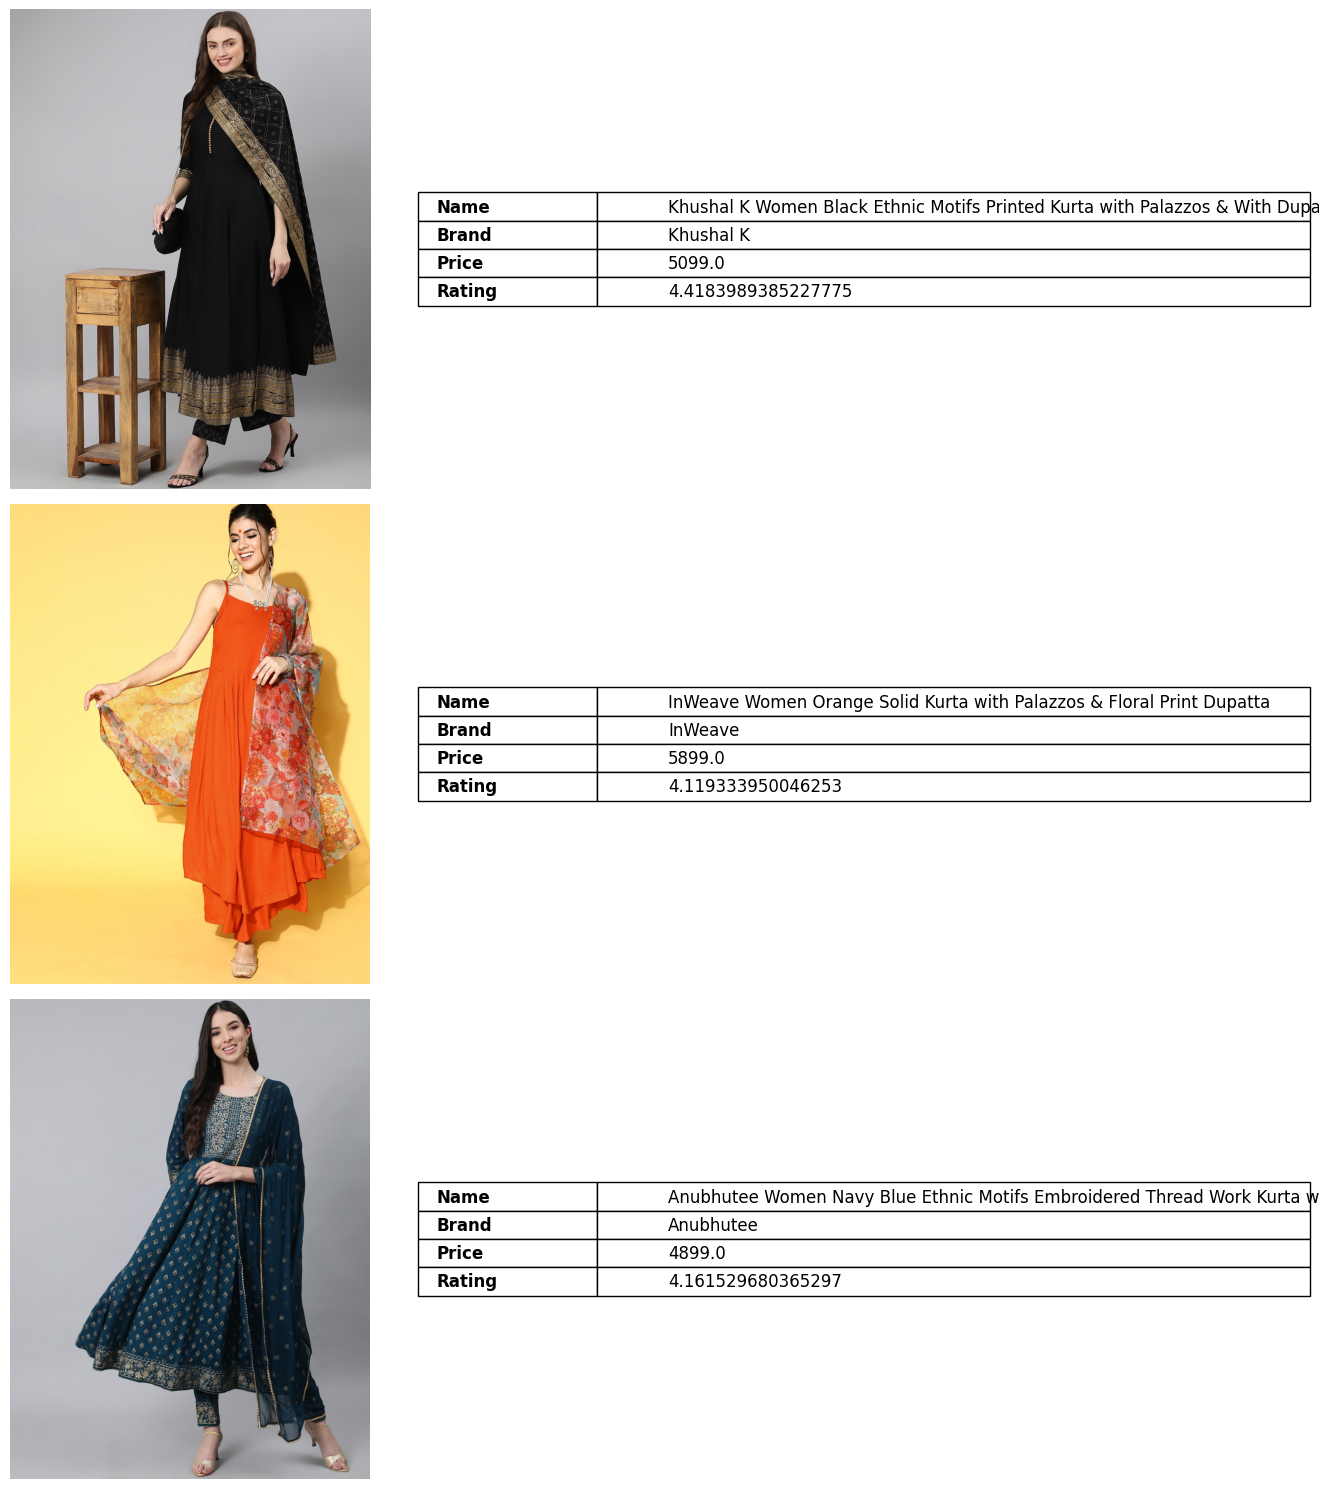

In [ ]:
# Display images with mini tables for the first 3 images
display_images_with_info(fashion_data, images_folder_path, num_images=3)

In [8]:

# Print the columns of the fashion_data DataFrame
print(fashion_data.columns)

Index(['p_id', 'name', 'products', 'price', 'colour', 'brand', 'img',
       'ratingCount', 'avg_rating', 'description', 'p_attributes'],
      dtype='object')


In [9]:

# Print the information about the fashion_data DataFrame
print(fashion_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14214 entries, 0 to 14213
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   p_id          14214 non-null  int64  
 1   name          14214 non-null  object 
 2   products      14214 non-null  object 
 3   price         14214 non-null  float64
 4   colour        14214 non-null  object 
 5   brand         14214 non-null  object 
 6   img           14214 non-null  object 
 7   ratingCount   6530 non-null   float64
 8   avg_rating    6530 non-null   float64
 9   description   14214 non-null  object 
 10  p_attributes  14214 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 1.2+ MB
None


### **Dataset Chunking Explanation**

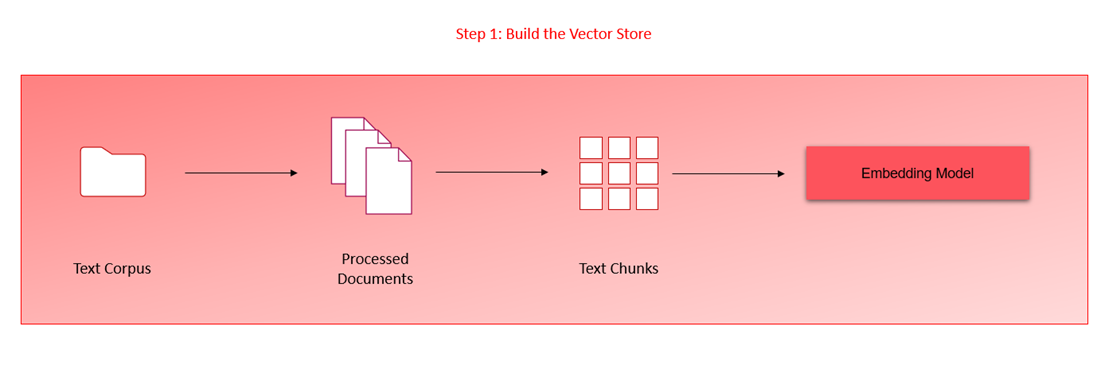
In this analysis, we have decided not to implement dataset chunking. The rationale behind this choice is as follows:

1. **Dataset Structure**:  
   Our dataset is well-organized, with each data point represented in rows and columns. This makes it easy to handle without additional preprocessing.

2. **Chunking Use Case**:  
   Chunking is typically employed for large datasets that exceed memory limitations or require processing in smaller segments based on specific parameters, such as time periods, categories, or other criteria.

3. **Current Decision**:  
   - Given the manageable size of our dataset, chunking is not necessary for the current analysis.  
   - Due to time constraints, focusing on a straightforward approach without chunking allows us to streamline the process.

4. **Future Considerations**:  
   If our dataset size increases or our analysis scope broadens, we may consider chunking to optimize data processing. For now, we will proceed with the entire dataset to perform analyses and derive insights effectively.

---

### **3. Generate and Store Embeddings Using OpenAI and ChromaDB**

In this section, we will:
- Utilize OpenAI's `text-embedding-ada-002` model to generate high-quality embeddings for the textual content in our dataset.
- Store the generated embeddings in a ChromaDB collection for efficient retrieval and similarity-based analysis.

#### **Embedding Layer Overview**:
The embedding layer is the core of our pipeline, converting textual data into numerical representations (embeddings) that capture semantic meaning. This enables downstream tasks such as clustering, classification, and similarity searches.

#### **Pipeline Steps**:
1. **Text Preprocessing**:  
   Extract relevant textual fields from the dataset for embedding generation.

2. **Embedding Generation**:  
   Use OpenAI's state-of-the-art embedding model to compute high-dimensional vector representations.

3. **Storage in ChromaDB**:  
   Save the embeddings in a ChromaDB collection, along with metadata, for efficient query and analysis.


In [ ]:
#rm -rf /content/drive/MyDrive/FashionSearchAI-MyntraDataset-main/ChromaDB_Data*


In [11]:
# Define the file path to retrieve the API key
filepath = "/content/drive/My Drive/Gen_AI/"

# Read the API key from the text file and strip any leading or trailing whitespace
with open("/content/OPENAI_API_Key.txt", "r") as f:
    api_key = f.read().strip()

# Set the API key for OpenAI
openai.api_key = api_key

# Define the path for storing ChromaDB collections
chroma_data_path = '/content/drive/MyDrive/FashionSearchAI-MyntraDataset-main/ChromaDB_Data'

# Initialize the ChromaDB client with the specified data path
client = chromadb.PersistentClient(path=chroma_data_path)

# Set up the embedding function using the OpenAI embedding model
model = "text-embedding-ada-002"
embedding_function = OpenAIEmbeddingFunction(api_key=api_key, model_name=model)

# Load the fashion dataset from the CSV file
fashion_data = pd.read_csv(file_path)

# Convert the data to a dictionary format with metadata
fashion_data['metadata'] = fashion_data.apply(
    lambda x: {
        'Product_id': x['p_id'],  # Unique identifier for the product
        'Name': x['name'],  # Product name
        'Product_type': x['products'],  # Type or category of the product
        'Price_INR': x['price'],  # Price of the product in Indian Rupees
        'Colour': x['colour'],  # Color of the product
        'Brand': x['brand'],  # Brand of the product
        'RatingCount': x['ratingCount'],  # Number of ratings received
        'Rating': x['avg_rating'],  # Average rating of the product
        'Description': x['description'],  # Description of the product
        'Product_attributes': x['p_attributes']  # Additional attributes of the product
    }, axis=1
)

# Function to extract text for embedding
def extract_text(metadata):
    """
    Extracts text content from the metadata dictionary for embedding.

    Args:
    metadata (dict): Dictionary containing metadata information.

    Returns:
    str: Text content extracted from the metadata.
    """
    text_content = ""
    if "Description" in metadata and metadata["Description"]:
        text_content += metadata["Description"]  # Add product description
    if "name" in metadata:
        text_content += " " + metadata["name"]  # Add product name
    if not text_content:
        text_content = "No description available."
    return text_content.strip()  # Strip leading and trailing whitespace

# Extract text for embedding from each row of metadata
documents = [extract_text(row['metadata']) for _, row in fashion_data.iterrows()]

# Get or create a ChromaDB collection for fashion products
fashion_collection = client.get_or_create_collection(name='Fashion_Products', embedding_function=embedding_function)

# Add the data to the ChromaDB collection
for idx, (p_id, metadata) in enumerate(zip(fashion_data['p_id'], fashion_data['metadata'])):
    print(f"Processing document with p_id={p_id}")
    print(f"Document text: {documents[idx]}")
    fashion_collection.add(
        documents=[documents[idx]],  # Text content of the document
        ids=[str(p_id)],  # Unique identifier of the document
        metadatas=[metadata]  # Metadata associated with the document
    )

print("Data added to ChromaDB collection!")


Streaming output truncated to the last 5000 lines.
Document text: Charcoal grey printed Dupatta and has a tasselled border<p>Length: 2.3metres<br>Width: 0.9metre</p>Material: Silk Blend<br>  Hand Wash
Processing document with p_id=18601482
Document text: White graphic printed open front jacket,  has a spread collar,  2  pockets ,has a button closure, long sleeves,  straight  hemline, without  liningThe model (height 5'8) is wearing a size Scotton<br>Machine Wash
Processing document with p_id=13401782
Document text: Black solid jacket, has a spread collar, 4 pockets, button closure, long sleeves, straight hem, and unlined liningThe model (height 5'8") is wearing a size SMaterial: Cotton<br>  Machine Wash
Processing document with p_id=12178124
Document text: Blue washed jacket, has a spread collar, 4 pockets, button closure, long sleeves, straight hem100% cotton<br>Machine WashThe model (height 5'8") is wearing a size S
Processing document with p_id=17685324
Document text: Blue solid lig

In [12]:
# Peek into the first 5 documents in the Fashion_Products collection
fashion_collection.peek(5)

{'ids': ['17048614', '16524740', '16331376', '14709966', '11056154'],
 'embeddings': array([[-0.01990156,  0.00552968,  0.02161721, ...,  0.0088686 ,
         -0.00566165, -0.01627229],
        [-0.00135069, -0.00350716,  0.00736438, ...,  0.00427662,
         -0.00303492, -0.02269418],
        [-0.02379343,  0.00543925,  0.02098183, ..., -0.00373127,
          0.00126784, -0.00932818],
        [-0.01955775,  0.00557357,  0.00393295, ...,  0.00584917,
         -0.00495753, -0.01565398],
        [-0.01309787,  0.00392936,  0.01978945, ..., -0.00475932,
          0.01154169, -0.02179952]]),
 'documents': ["Black printed Kurta with Palazzos with dupatta <br> <br> <b> Kurta design:  </b> <ul> <li> Ethnic motifs printed </li> <li> Anarkali shape </li> <li> Regular style </li> <li> Mandarin collar,  three-quarter regular sleeves </li> <li> Calf length with flared hem </li> <li> Viscose rayon machine weave fabric </li> </ul> <br> <b> Palazzos design:  </b> <ul> <li> Printed Palazzos </li> <li

In [13]:
# Specify the name for the cache collection
cache_collection_name = 'Fashion_Cache'

# Create or retrieve the cache collection for fashion search using the PersistentClient
cache_collection = client.get_or_create_collection(name=cache_collection_name, embedding_function=embedding_function)

In [14]:
# Display a preview of the cache collection to inspect its contents
cache_collection.peek()

{'ids': [],
 'embeddings': array([], dtype=float64),
 'documents': [],
 'uris': None,
 'data': None,
 'metadatas': [],
 'included': [<IncludeEnum.embeddings: 'embeddings'>,
  <IncludeEnum.documents: 'documents'>,
  <IncludeEnum.metadatas: 'metadatas'>]}

# **4. Semantic Search with Cache**
In this section, we will perform a semantic search of a query in the collections embeddings to get several top semantically similar results.

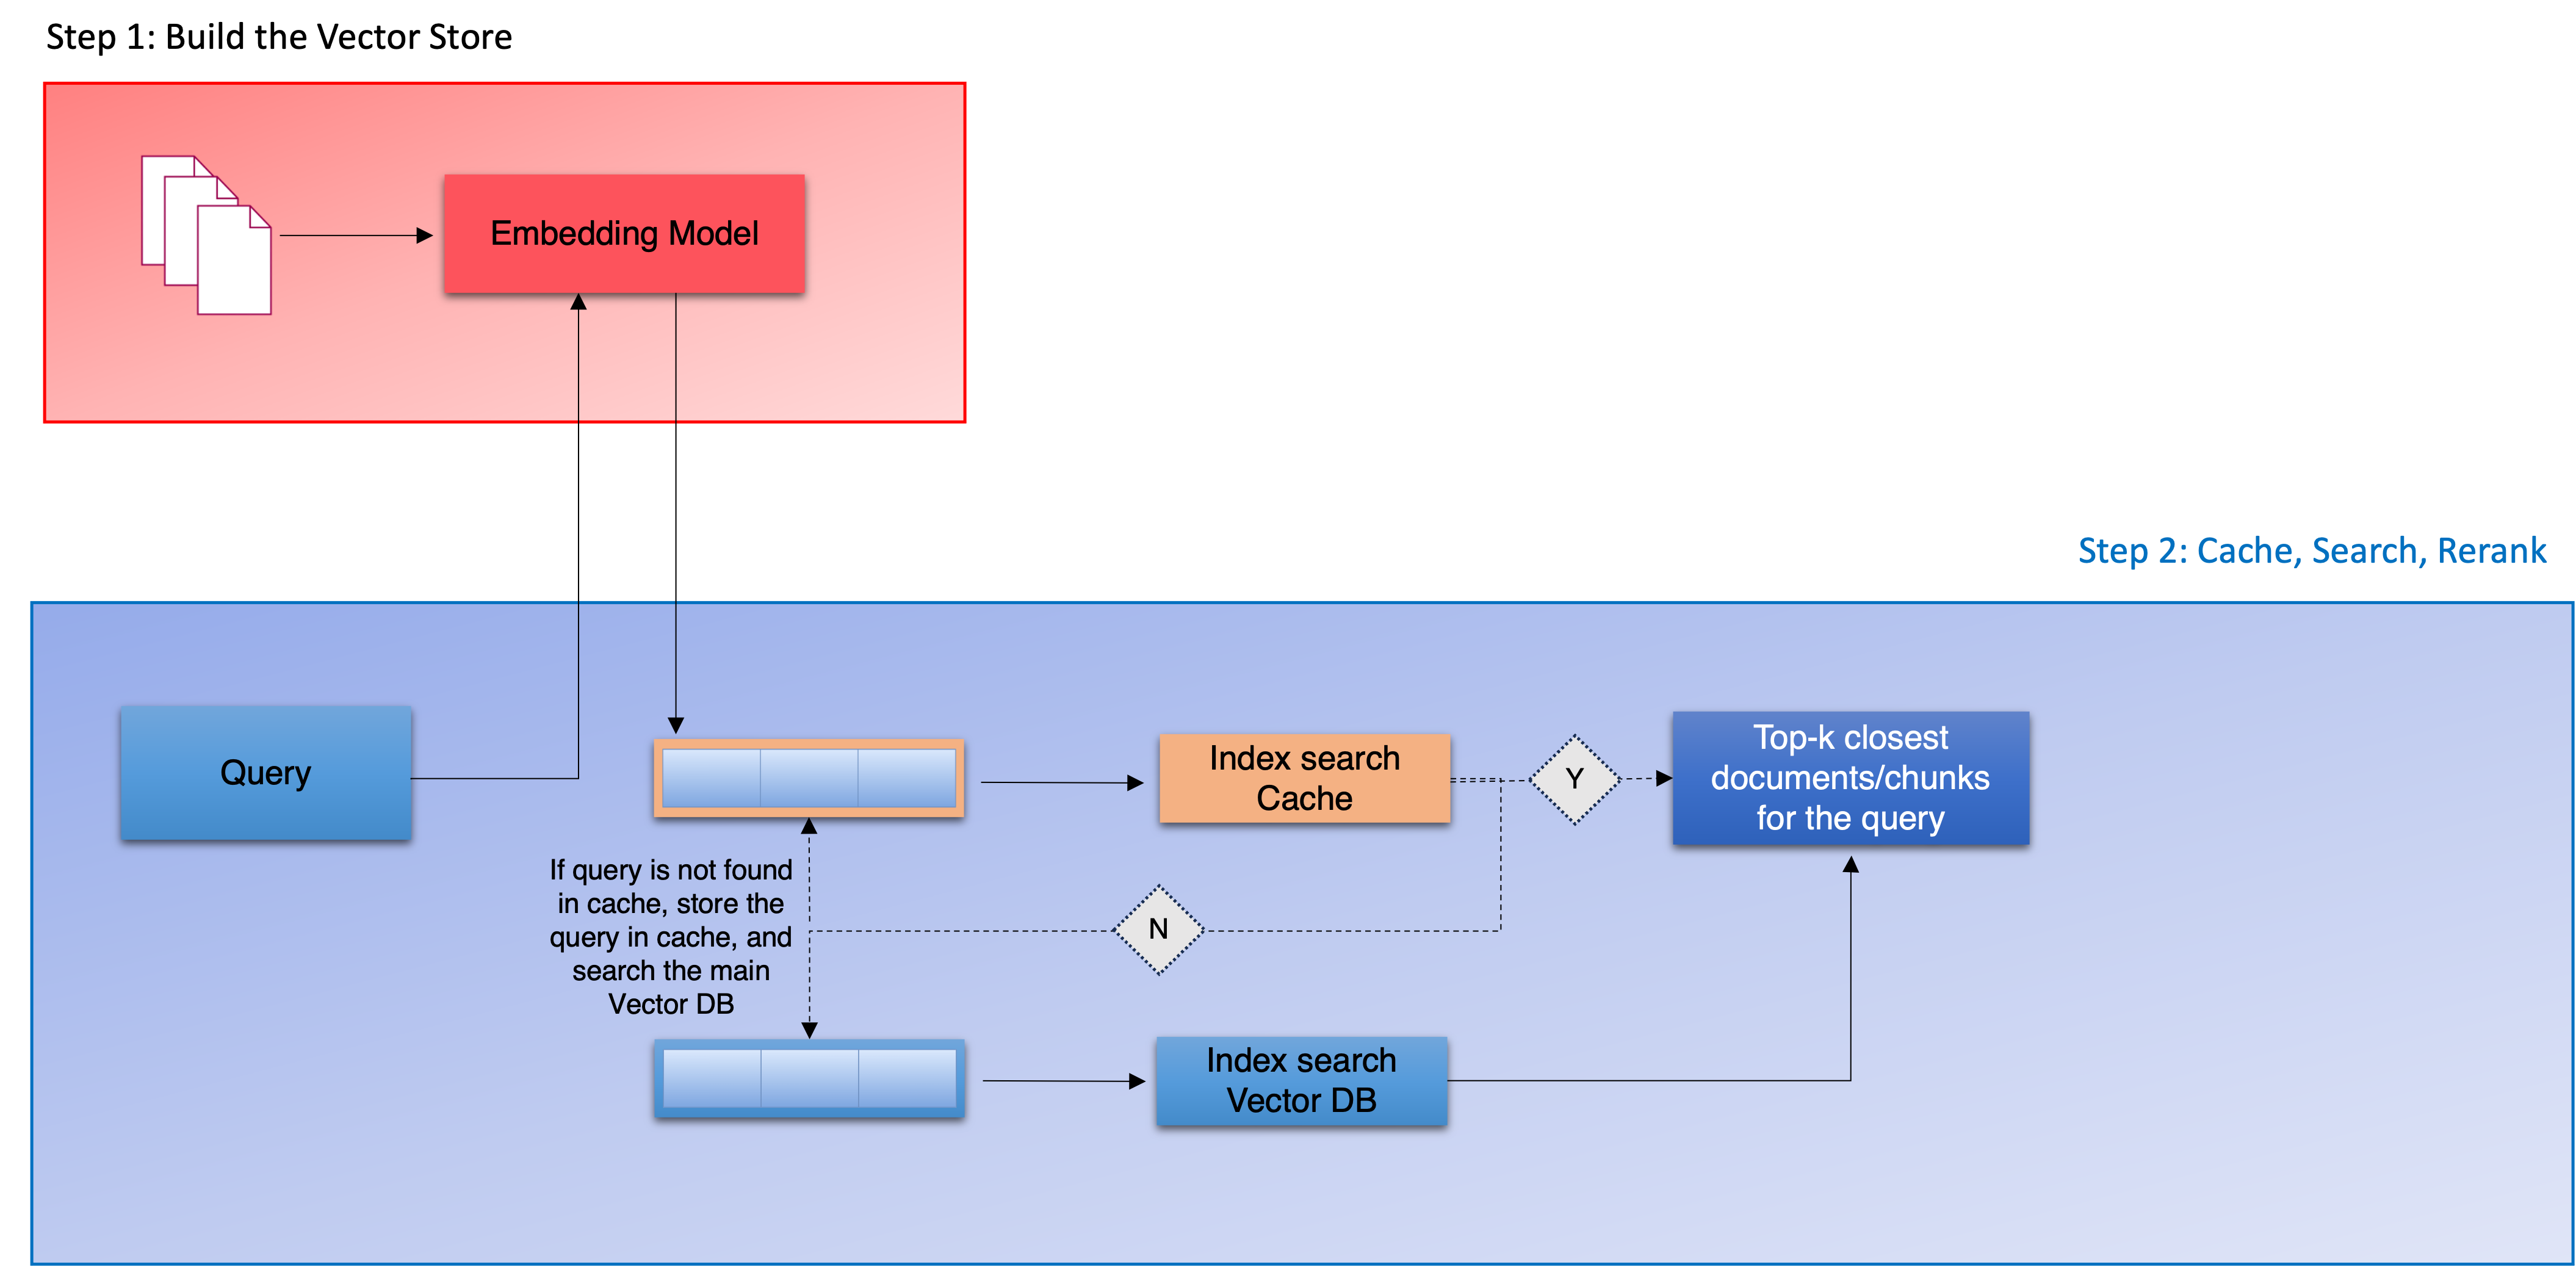

In [107]:
# Prompt the user to enter a fashion-related query with specific requirements
query = input("Please enter your fashion-related query. For example, you can mention the color, size, price range, style, and any specific patterns or designs you prefer: ")

#Query 1: Recommend yellow colour Kurta Plazzo set. Size M. Casual wear only
#Query 2: Please provide some two piece casual co-ord suits.
#Query 3: Recommend some straight fit jeans. It should be only black in colour and no design. No skinny fit also.
#Query 4: I'm looking for some pink lehengas. I prefer lehenga with full embroidered designs, suitable for parties and functions.

Please enter your fashion-related query. For example, you can mention the color, size, price range, style, and any specific patterns or designs you prefer: Recommend some straight fit jeans. It should be only black in colour and no design. No skinny fit also.


In [108]:

# Search the Cache collection first

cache_results = cache_collection.query(
    query_texts=query,  # User query
    n_results=5  # Number of results to retrieve
)
cache_results


{'ids': [['Recommend some straight fit jeans. No skinny fit',
   'Recommend yellow colour Kurta Plazzo set. Size M. Casual wear only',
   "I'm looking for some pink colour suits. I prefer suits with full embroidered designs, suitable for parties and functions.",
   'Please provide some co-ord suits that can be worn in office']],
 'embeddings': None,
 'documents': [['Recommend some straight fit jeans. No skinny fit',
   'Recommend yellow colour Kurta Plazzo set. Size M. Casual wear only',
   "I'm looking for some pink colour suits. I prefer suits with full embroidered designs, suitable for parties and functions.",
   'Please provide some co-ord suits that can be worn in office']],
 'uris': None,
 'data': None,
 'metadatas': [[{'distances0': '0.28232452273368835',
    'distances1': '0.2824646830558777',
    'distances2': '0.29523441195487976',
    'distances3': '0.2959783673286438',
    'distances4': '0.2971664071083069',
    'documents0': "<ul><li>Dark shade, no fade black jeans</li><li

# **Search Layer**

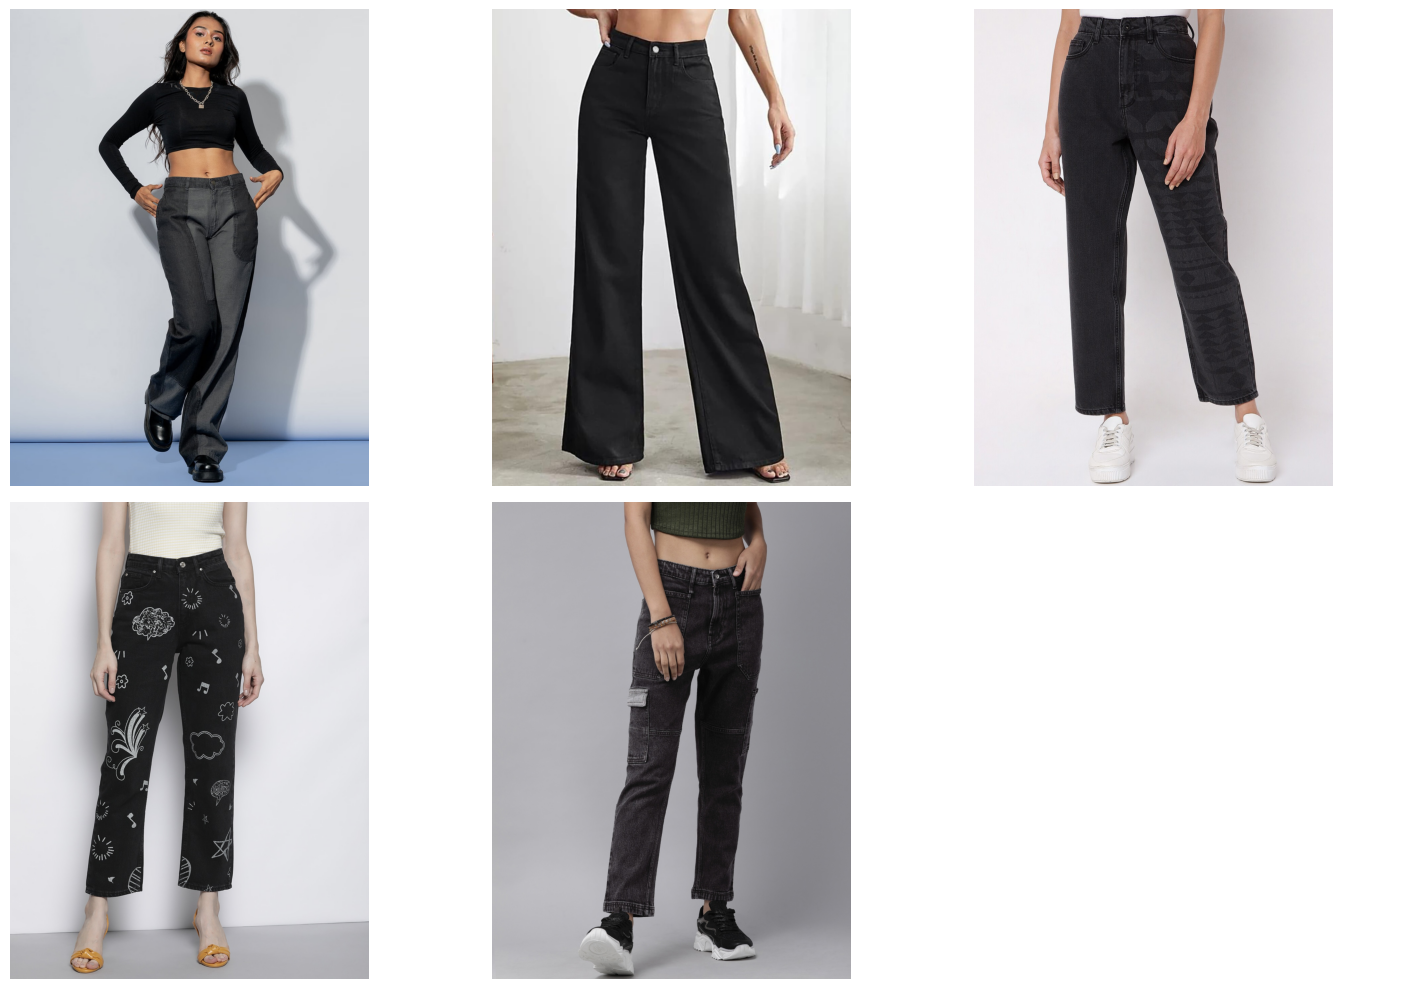

-------------------------------------------------------



dict_items([('ids', [['18507630', '19259882', '18074032', '18769654', '14954878']]), ('embeddings', None), ('documents', [["Stay in vogue by donning this trendy pair of jeans for your next casual outing. This charming pair of jeans comes with a lovely straight fit and a high-rise waist.&nbsp;<ul><li>Black colour</li><li>Straight Fit</li><li>High-Rise waist</li><li>Regular length</li><li></li><li>Cotton, Machine Wash</li></ul><p>Machine Wash</p><br> Fit: Straight Fit <br> Non Stretchable <br> The model (height 5'8) is wearing a size 28", "<ul><li>Dark shade, no fade black jeans</li><li>Straight fit, high-rise</li><li>Brand Fit: jean</li><li>Clean look</li><li>Stretchable</li><li>5 pocket</li><li>Length: regular</li></ul>98% Cotton 2% Lycra<br>Machine washBrand Fit: Jean <br> Fit: Straight Fit <br> Stretchable <br> The model (height 5'8) is wearing a size 28", "<ul> <li> Dark shade,  no fade black jeans </li> <li> Straight fit,  high-rise </li> <li> Clean look </li> <li> Non stretchable 

In [109]:
# Query the fashion collection to retrieve relevant fashion items based on the user query
results = fashion_collection.query(
    query_texts=query,  # User query provided as input
    n_results=5  # Number of results to retrieve, in this case, the top 3 most relevant results
)


import matplotlib.pyplot as plt
import os
from PIL import Image

# Assuming you have already obtained the search results in the variable 'results'

# Extract the IDs of the fashion items from the search results
item_ids = results['ids'][0]  # Assuming the IDs are stored as the first element of the list

# Calculate the number of images
num_images = len(item_ids)

# Define the number of columns for the grid layout
num_cols = 3

# Calculate the number of rows needed based on the number of images and number of columns
num_rows = (num_images + num_cols - 1) // num_cols

# Set up the plot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows*5))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Display the images along with metadata
for i, item_id in enumerate(item_ids):
    # Construct the path to the image file
    image_path = os.path.join(images_folder_path, str(item_id) + '.jpg')

    # Check if the image file exists
    if os.path.exists(image_path):
        # Open and display the image
        img = Image.open(image_path)
        axes[i].imshow(img)
        axes[i].axis('off')
    else:
        axes[i].axis('off')
        axes[i].text(0.5, 0.5, f"Image not found for item ID: {item_id}",
                     fontsize=12, ha='center', va='center')

# Hide any remaining empty subplots
for j in range(num_images, num_rows * num_cols):
    axes[j].axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


print("-------------------------------------------------------\n")
# Extract and display the items retrieved from the search operation
results.items()

In [110]:
# Implementing Cache in Semantic Search

# Set a threshold for cache search
threshold = 0.2

ids = []
documents = []
distances = []
metadatas = []
results_df = pd.DataFrame()

# Check if the distance is greater than the threshold, if so, return results from the main collection
if cache_results['distances'][0] == [] or cache_results['distances'][0][0] > threshold:
    # Query the collection against the user query and return the results
    results = fashion_collection.query(
        query_texts=query,
        n_results=5
    )

    # Store the query in cache_collection as a document with respect to ChromaDB for future reference
    # Store retrieved text, ids, distances, and metadatas in cache_collection as metadatas, so they can be fetched easily if a query indeed matches to a query in cache
    Keys = []
    Values = []

    for key, val in results.items():
        if val is None:
            continue
        for i in range(len(val[0])):  # Iterate over the actual length of val
            Keys.append(str(key) + str(i))
            if len(val[0]) > i:  # Check if the current index exists in val
                Values.append(str(val[0][i]))

    cache_collection.add(
        documents=[query],
        ids=[query],
        metadatas=dict(zip(Keys, Values))
    )

    # Print message indicating the results are found in the main collection
    print("Not found in cache. Found in the main collection.")

    # Construct a DataFrame from the query results
    result_dict = {'Metadatas': results['metadatas'][0], 'Documents': results['documents'][0], 'Distances': results['distances'][0], "IDs": results["ids"][0]}
    results_df = pd.DataFrame.from_dict(result_dict)


# If the distance is less than the threshold, return results from the cache
elif cache_results['distances'][0][0] <= threshold and cache_results['ids']:
    cache_result_dict = cache_results['metadatas'][0][0]

    # Loop through each inner list and then through the dictionary
    for key, value in cache_result_dict.items():
        if 'ids' in key:
            ids.append(value)
        elif 'documents' in key:
            documents.append(value)
        elif 'distances' in key:
            distances.append(value)
        elif 'metadatas' in key:
            metadatas.append(value)

    # Print message indicating the results are found in the cache
    print("Found in cache!")

    # Create a DataFrame from the cached results
    results_df = pd.DataFrame({
        'IDs': ids,
        'Documents': documents,
        'Distances': distances,
        'Metadatas': metadatas
    })
else:
    # Print message indicating no valid results found in cache
    print("No valid results found in cache!")




Found in cache!


Query: 
Recommend some straight fit jeans.
It should be only black in colour and no design.
No skinny fit also.


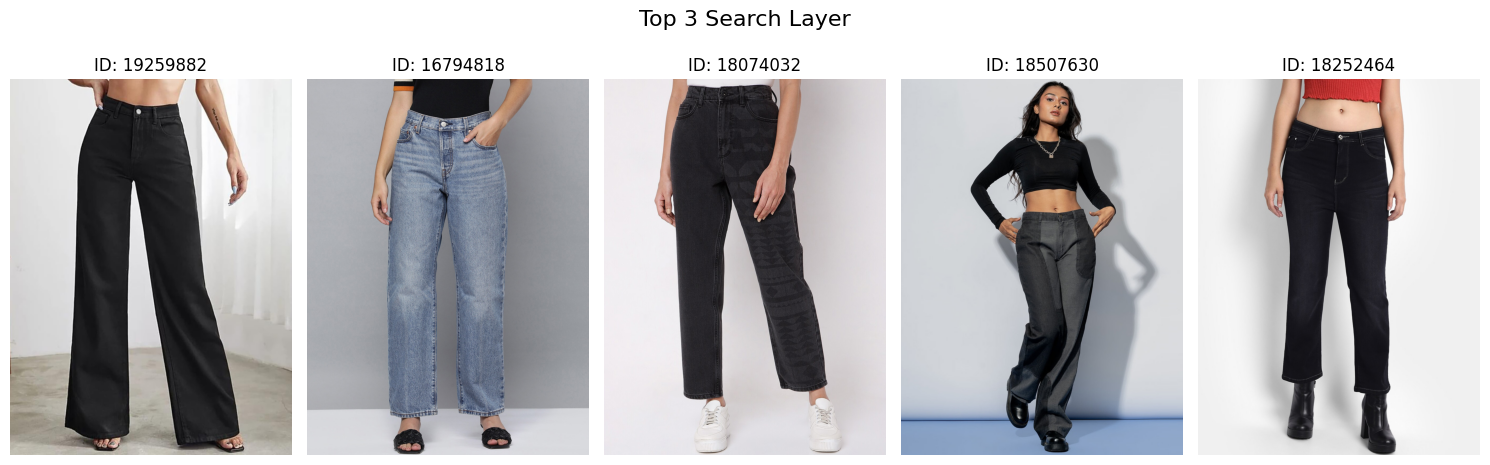

IDs                                          Documents  \
0  19259882  <ul><li>Dark shade, no fade black jeans</li><l...   
1  16794818  <ul><li>Light shade, no fade blue jeans</li><l...   
2  18074032  <ul> <li> Dark shade,  no fade black jeans </l...   
3  18507630  Stay in vogue by donning this trendy pair of j...   
4  18252464  <ul> <li> Dark shade,  no fade black jeans </l...   

             Distances                                          Metadatas  
0  0.28232452273368835  {'Brand': 'Kotty', 'Colour': 'Black', 'Descrip...  
1   0.2824646830558777  {'Brand': 'Levis', 'Colour': 'Blue', 'Descript...  
2  0.29523441195487976  {'Brand': 'Vero Moda', 'Colour': 'Black', 'Des...  
3   0.2959783673286438  {'Brand': 'FREAKINS', 'Colour': 'Black', 'Desc...  
4   0.2971664071083069  {'Brand': 'Next One', 'Colour': 'Black', 'Desc...

In [111]:
##For Screenshot

# Define the function to print query with a prefix and separator
def print_query_with_separator(prefix, query):
    # Print the prefix
    print(prefix)
    # Insert a newline character after every full stop
    query_with_newlines = query.replace(". ", ".\n")
    # Print the modified query
    print(query_with_newlines)

# Print the query with prefix and separator
print_query_with_separator("Query: ", query)

# Print the IDs from the results DataFrame
##print("IDs:")
#print(results_df['IDs'])


# Display images corresponding to the IDs side by side
num_images = len(results_df['IDs'])
fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

# Set the title of the plot as the user query
fig.suptitle("Top 3 Search Layer", fontsize=16)

for i, item_id in enumerate(results_df['IDs']):
    # Construct the path to the image file
    image_path = os.path.join(images_folder_path, str(item_id) + '.jpg')

    # Check if the image file exists
    if os.path.exists(image_path):
        # Open and display the image
        img = Image.open(image_path)
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f"ID: {item_id}")
    else:
        print(f"Image not found for item ID: {item_id}")

plt.tight_layout()
plt.show()

results_df


In [112]:

# Query the cache collection for results matching the user query
cache_results = cache_collection.query(
    query_texts=query,
    n_results=1
)

# Print the cache results
cache_results


{'ids': [['Recommend some straight fit jeans. No skinny fit']],
 'embeddings': None,
 'documents': [['Recommend some straight fit jeans. No skinny fit']],
 'uris': None,
 'data': None,
 'metadatas': [[{'distances0': '0.28232452273368835',
    'distances1': '0.2824646830558777',
    'distances2': '0.29523441195487976',
    'distances3': '0.2959783673286438',
    'distances4': '0.2971664071083069',
    'documents0': "<ul><li>Dark shade, no fade black jeans</li><li>Straight fit, high-rise</li><li>Brand Fit: jean</li><li>Clean look</li><li>Stretchable</li><li>5 pocket</li><li>Length: regular</li></ul>98% Cotton 2% Lycra<br>Machine washBrand Fit: Jean <br> Fit: Straight Fit <br> Stretchable <br> The model (height 5'8) is wearing a size 28",
    'documents1': "<ul><li>Light shade, no fade blue jeans</li><li>501 Straight fit, high-rise</li><li>Clean look</li><li>Non stretchable</li><li>5 pocket</li><li>Length: regular</li></ul>100% Cotton,<br>Machine-washFit: 501 Straight Fit<br>Non Stretchab

# **5.Re-Ranking with a Cross Encoder**

Re-ranking the results obtained from your semantic search can sometime significantly improve the relevance of the retrieved results. This is often done by passing the query paired with each of the retrieved responses into a cross-encoder to score the relevance of the response w.r.t. the query.



In [95]:
# Initialise the cross encoder model

cross_encoder = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2')

In [96]:

# Create input pairs for the cross encoder, consisting of each query paired with each response
cross_inputs = [[query, response] for response in results_df['Documents']]

# Generate cross-encoder scores for the input pairs
cross_rerank_scores = cross_encoder.predict(cross_inputs)

# Display the cross-encoder scores
cross_rerank_scores

array([0.72638345, 2.1930337 , 2.2258253 , 2.653357  , 1.7686546 ],
      dtype=float32)

In [97]:

# Add the cross-encoder scores to the results DataFrame
results_df['Reranked_scores'] = cross_rerank_scores

# Display the updated results DataFrame
results_df


IDs                                          Documents  \
0  19104088  Pink and purple embellished lehenga choli with...   
1  17493338  Pink and green embroidered lehenga choli with ...   
2  16877306  Pink and purple embroidered lehenga choli with...   
3  19301938  Pink and blue embroidered lehenga choli with d...   
4  17053210  Purple and pink embroidered lehenga choli with...   

             Distances                                          Metadatas  \
0   0.3207966089248657  {'Brand': 'Granthva Fab', 'Colour': 'Pink', 'D...   
1  0.32306399941444397  {'Brand': 'Pothys', 'Colour': 'Pink', 'Descrip...   
2   0.3248786926269531  {'Brand': 'Mitera', 'Colour': 'Pink', 'Descrip...   
3  0.32545408606529236  {'Brand': 'HERE&NOW', 'Colour': 'Pink', 'Descr...   
4   0.3257109522819519  {'Brand': 'Netram', 'Colour': 'Purple', 'Descr...   

   Reranked_scores  
0         0.726383  
1         2.193034  
2         2.225825  
3         2.653357  
4         1.768655

In [98]:
# Return the top 3 results from semantic search based on the Distance
top_3_semantic = results_df.sort_values(by='Distances', ascending=False)[:3]

# Display the top 3 semantic search results
top_3_semantic

IDs                                          Documents  \
4  17053210  Purple and pink embroidered lehenga choli with...   
3  19301938  Pink and blue embroidered lehenga choli with d...   
2  16877306  Pink and purple embroidered lehenga choli with...   

             Distances                                          Metadatas  \
4   0.3257109522819519  {'Brand': 'Netram', 'Colour': 'Purple', 'Descr...   
3  0.32545408606529236  {'Brand': 'HERE&NOW', 'Colour': 'Pink', 'Descr...   
2   0.3248786926269531  {'Brand': 'Mitera', 'Colour': 'Pink', 'Descrip...   

   Reranked_scores  
4         1.768655  
3         2.653357  
2         2.225825

In [99]:

# Return the top 3 results after reranking

top_3_rerank = results_df.sort_values(by='Reranked_scores', ascending=False)
top_3_rerank

IDs                                          Documents  \
3  19301938  Pink and blue embroidered lehenga choli with d...   
2  16877306  Pink and purple embroidered lehenga choli with...   
1  17493338  Pink and green embroidered lehenga choli with ...   
4  17053210  Purple and pink embroidered lehenga choli with...   
0  19104088  Pink and purple embellished lehenga choli with...   

             Distances                                          Metadatas  \
3  0.32545408606529236  {'Brand': 'HERE&NOW', 'Colour': 'Pink', 'Descr...   
2   0.3248786926269531  {'Brand': 'Mitera', 'Colour': 'Pink', 'Descrip...   
1  0.32306399941444397  {'Brand': 'Pothys', 'Colour': 'Pink', 'Descrip...   
4   0.3257109522819519  {'Brand': 'Netram', 'Colour': 'Purple', 'Descr...   
0   0.3207966089248657  {'Brand': 'Granthva Fab', 'Colour': 'Pink', 'D...   

   Reranked_scores  
3         2.653357  
2         2.225825  
1         2.193034  
4         1.768655  
0         0.726383

In [100]:
top_3_RAG = top_3_rerank[["Documents", "Metadatas","IDs"]]
top_3_RAG

Documents  \
3  Pink and blue embroidered lehenga choli with d...   
2  Pink and purple embroidered lehenga choli with...   
1  Pink and green embroidered lehenga choli with ...   
4  Purple and pink embroidered lehenga choli with...   
0  Pink and purple embellished lehenga choli with...   

                                           Metadatas       IDs  
3  {'Brand': 'HERE&NOW', 'Colour': 'Pink', 'Descr...  19301938  
2  {'Brand': 'Mitera', 'Colour': 'Pink', 'Descrip...  16877306  
1  {'Brand': 'Pothys', 'Colour': 'Pink', 'Descrip...  17493338  
4  {'Brand': 'Netram', 'Colour': 'Purple', 'Descr...  17053210  
0  {'Brand': 'Granthva Fab', 'Colour': 'Pink', 'D...  19104088

## 6. Retrieval Augmented Generation

Now that we have the final top search results, we can pass it to an GPT 3.5 along with the user query and a well-engineered prompt, to generate a direct answer to the query along with citations, rather than returning whole pages/chunks.

Based on your query for a yellow color Kurta Palazzo set in size M for casual wear, here are the recommendations from the top 3 search results:

1. **Soch Yellow Kurta Palazzo Set**:
   - Brand: Soch
   - Description: This clothing set consists of a yellow Kurta and Palazzo, perfect for casual wear.
  
2. **Vishudh Yellow and Black Printed Kurta**:
   - Brand: Vishudh
   - Description: Yellow and Black printed straight Kurta, suitable for casual occasions.
  
3. **Anouk Yellow and White Printed Kurta with Palazzos**:
   - Brand: Anouk
   - Description: Yellow and white printed Kurta paired with Palazzos, offering a casual and stylish ensemble.

For more detailed information on these recommendations or to explore further options, you can visit our website page.

We hope these recommendations meet your requirements for a yellow Kurta Palazzo set in size M for casual wear.


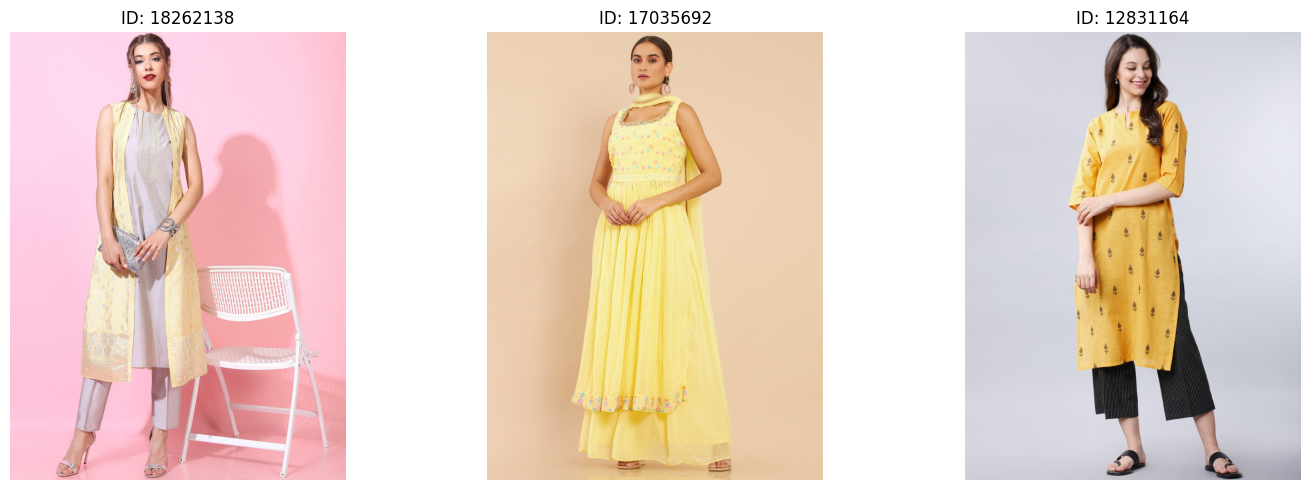

In [88]:
def generate_response_fashion(query, top_3_RAG):
    """
    Generate a response using GPT-3.5's ChatCompletion based on the user query and retrieved information.
    """
    messages = [
        {"role": "system", "content":  "You are a helpful AI assistant in the fashion domain, specialized in providing accurate answers to fashion-related queries."},
        {"role": "user", "content": f"""You have received a query from a user looking for fashion-related information. The query is: "{query}".
                                        Additionally, you have obtained the top 3 relevant results from the fashion dataset in the dataframe '{top_3_RAG}'.

                                        The 'Documents' column in this dataframe contains descriptions of fashion items, and the 'Metadatas' column contains additional information such as item name, brand.

                                        Your task is to use the information provided in '{top_3_RAG}' to generate a response to the query "{query}". Ensure that your response is informative and relevant to the user's query. Utilize the metadata to cite the relevant fashion items.

                                        Please adhere to the following guidelines:
                                        1. Provide accurate and relevant information based on the user query and the top 3 search results.
                                        2. You may use any relevant details from the dataframe to craft your response.
                                        3. If any of the fashion items contain tables or structured information, format and present it clearly.
                                        4. Use the metadata to cite the names, brands of the relevant fashion items.
                                        5. If you are unable to provide a complete answer, offer guidance on where the user can find further information within the cited fashion items.
                                        6. As a user-facing assistant, focus on delivering a direct and concise response without delving into technical details.
                                        7. Please note that detailed price and rating information might change from time to time. For more details,you should recommend to visit our website page.

                                        Your response should directly address the user's query and include citations for the referenced fashion items. Present the information in a well-organized and easily understandable format.
                                        """},
    ]

    response = openai.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=messages
    )

    # Extracting p_ids directly from the 'IDs' column in top_3_RAG
    p_ids = top_3_RAG['IDs'].head(3).tolist()

    # Returning response and p_ids
    return response.choices[0].message.content, p_ids

# Generate response and p_ids based on the provided query and top_3_RAG DataFrame
response, p_ids = generate_response_fashion(query, top_3_RAG)

# Print the response
print(response)



# Display the images corresponding to the IDs obtained from the response side by side
num_images = len(p_ids)
fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

for i, item_id in enumerate(p_ids):
    # Construct the path to the image file
    image_path = os.path.join(images_folder_path, str(item_id) + '.jpg')

    # Check if the image file exists
    if os.path.exists(image_path):
        # Open and display the image
        img = Image.open(image_path)
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f"ID: {item_id}")
    else:
        print(f"Image not found for item ID: {item_id}")

plt.tight_layout()
plt.show()


# **Conclusion**

Comparing the search query results obtained from both the search layer and the generation layer, it's evident that the output from the generation layer is more detailed and easier to comprehend. While the search layer provides relevant results based on keyword matching or other predefined criteria, the generation layer leverages advanced AI models like GPT-3.5 to generate responses dynamically, incorporating context and generating detailed information tailored to the query.

The generation layer's ability to understand the query context and generate responses in natural language makes the output more informative and user-friendly. It can provide nuanced explanations, summaries, or even creative interpretations based on the input query. This results in responses that are not only relevant but also engaging and easy to read, enhancing the overall user experience.

Furthermore, the generation layer's flexibility allows it to adapt to various query formats and provide customized responses, catering to different user preferences and requirements. This versatility makes it a valuable tool for tasks requiring comprehensive understanding and communication of information.

In summary, while the search layer serves its purpose of retrieving relevant information efficiently, the generation layer significantly enhances the quality and readability of the output, making it a preferred choice for tasks where detailed and user-friendly responses are essential.